# **ANN**

## **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## **Importing Dataset** 

In [2]:
dataset = pd.read_csv('waterQuality1.csv')
dataset = dataset.drop(index=[7551, 7568, 7890], errors='ignore')
dataset['ammonia'] = dataset['ammonia'].astype(float)
dataset['is_safe'] = dataset['is_safe'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [3]:
X = dataset.iloc[:, 0: -1].values
y = dataset.iloc[:, -1].values
X.shape

(7996, 20)

## **Spliting Dataset** 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Normalizing Data** 

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Building the Model**

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units=6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))

classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(7, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## **Training of the ANN**

In [7]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.6295
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8904 - loss: 0.4577
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8939 - loss: 0.3834
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8881 - loss: 0.3650
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8856 - loss: 0.3597
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8871 - loss: 0.3538
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8896 - loss: 0.3481
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8838 - loss: 0.3592
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8894 - loss: 0.3480
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8812 - loss: 0.3646
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8825 - loss: 0.3619
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━

## **Saving Model**

In [8]:
classifier.save('water_quality_model.h5')

## **Predicting On Test Data**

In [9]:
y_pred = classifier.predict(X_test)

y_new_pred = []

for prediction in y_pred:
    if prediction > 0.5:
        y_new_pred.append(1)
    else:
        y_new_pred.append(0)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## **Accuracy on Test Data**

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_new_pred))

0.886875


## **Confusion Matrix**

<Axes: >

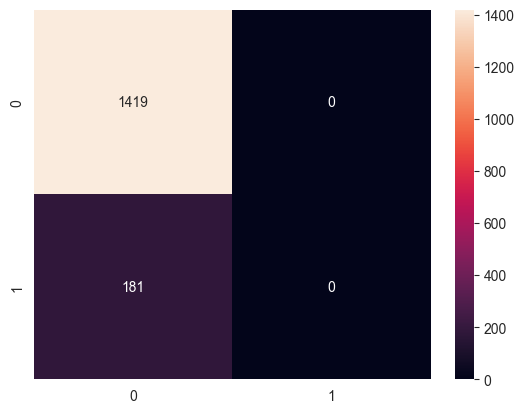

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_new_pred)
sns.heatmap(cm, annot=True,fmt="d")

In [12]:
import numpy as np
input_data = (1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.2,0,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

[[ 0.77153257 -0.58113663 -0.48280573  1.06736394 -0.99969106 -0.71092214
   2.14665706 -0.96783586 -1.65738189 -0.35625958 -0.87167087 -0.7970598
   1.12924229 -0.35154914  0.60699688  1.21352215  1.66647765  1.0447767
   1.36035624 -0.9164065 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.11417961]]


In [15]:
if prediction > 0.5:
    print('Water is safe')
else:
    print('Water is not safe')

Water is not safe


In [16]:
import joblib
from sklearn.preprocessing import StandardScaler

joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']